In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def plot(df,t):
    plt.figure(figsize=(10, 6))
    plt.plot(df['time'], df['ax'], label='ax')
    plt.plot(df['time'], df['ay'], label='ay')
    plt.plot(df['time'], df['az'], label='az')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.title(t)
    plt.legend()
    plt.grid(True)
    plt.show()

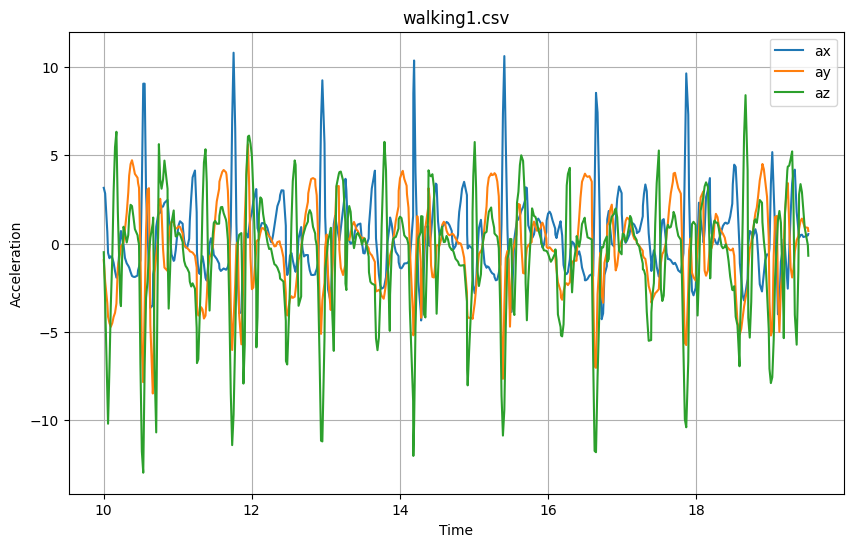

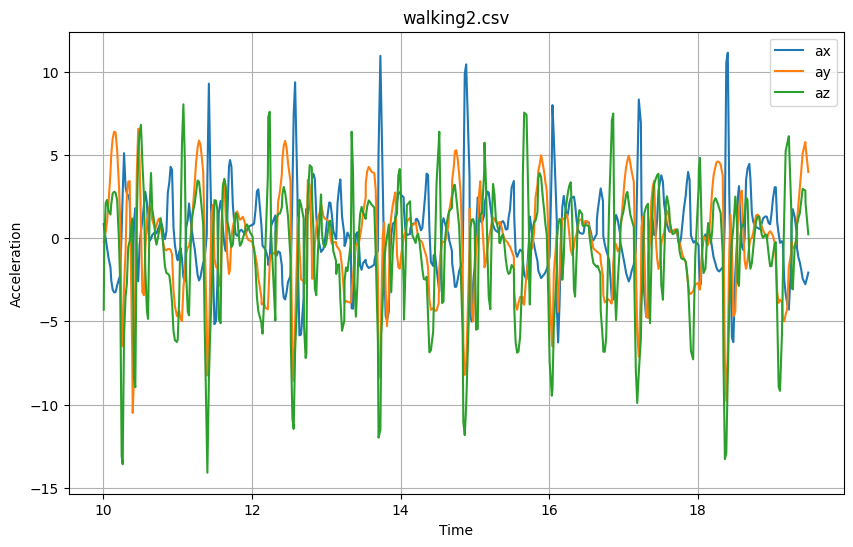

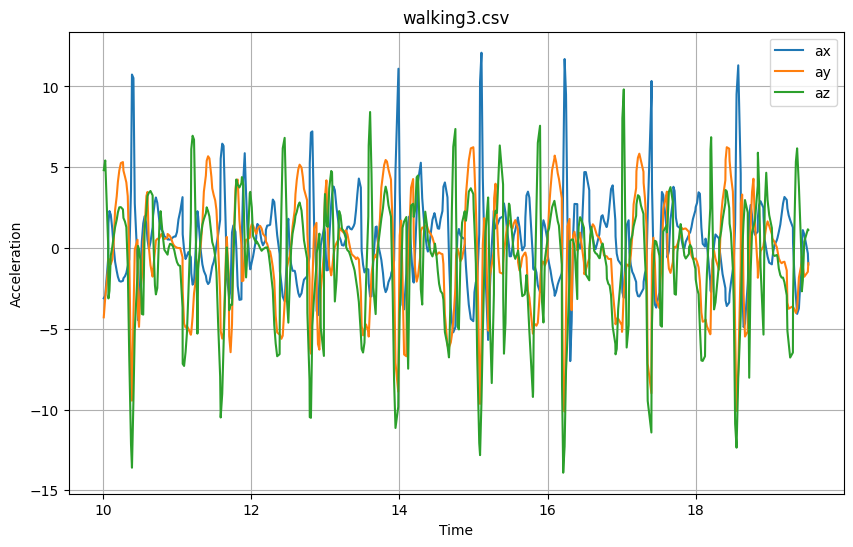

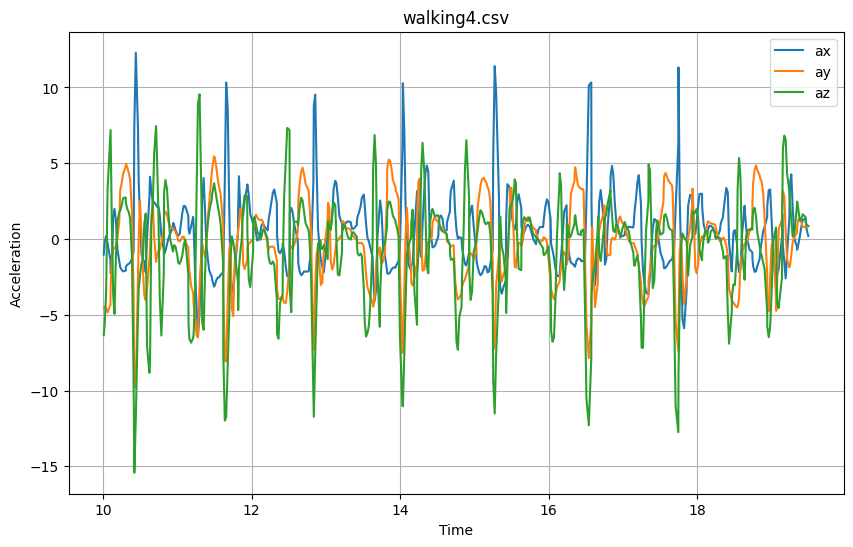

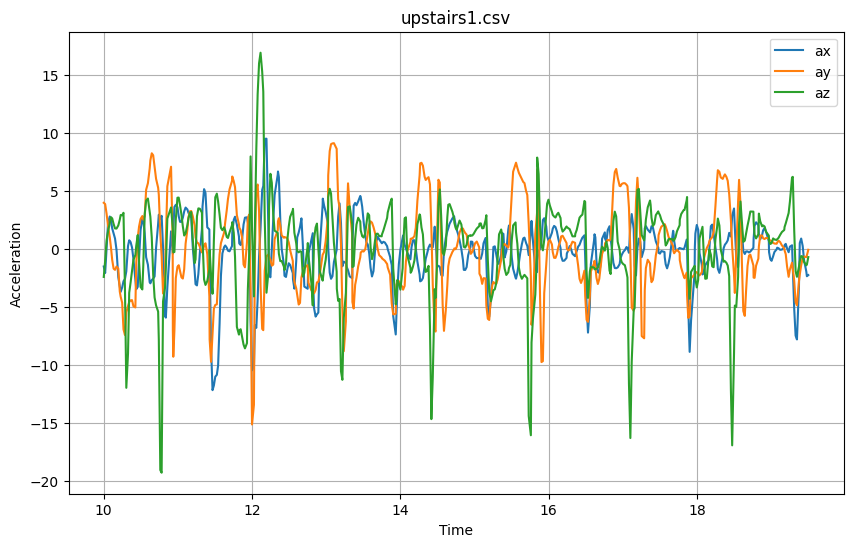

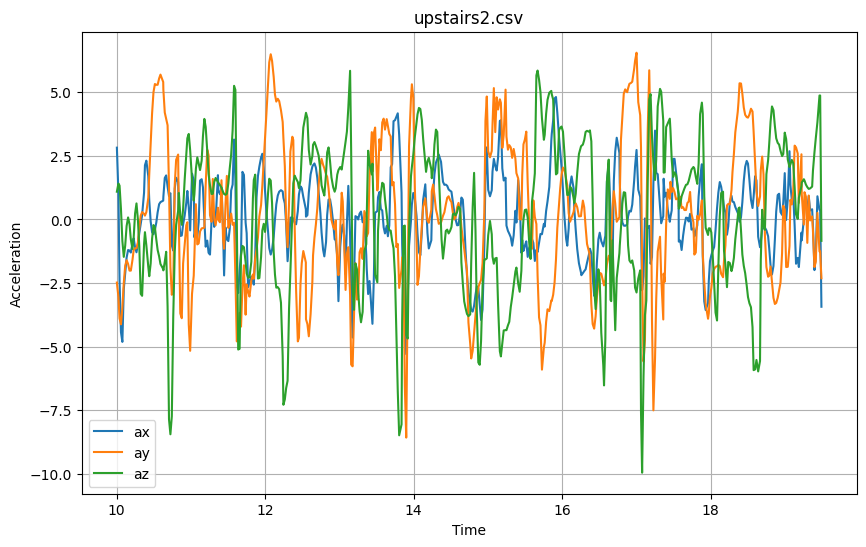

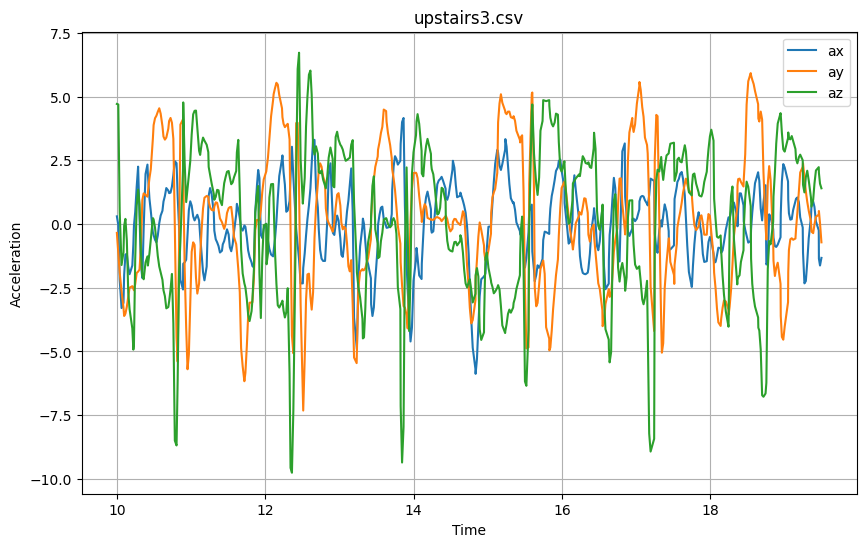

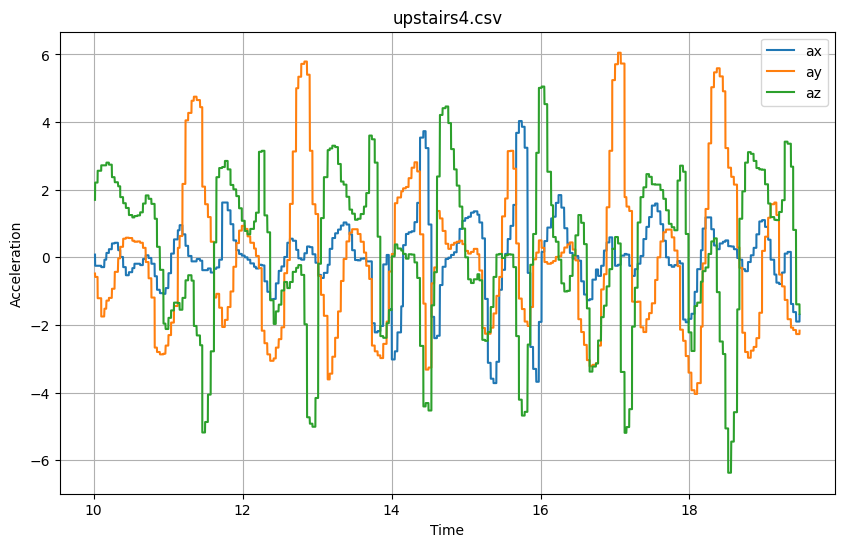

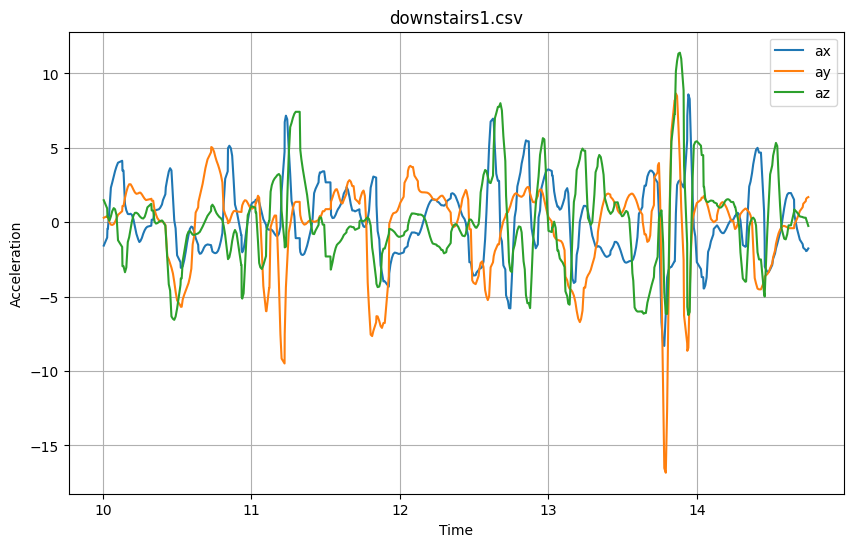

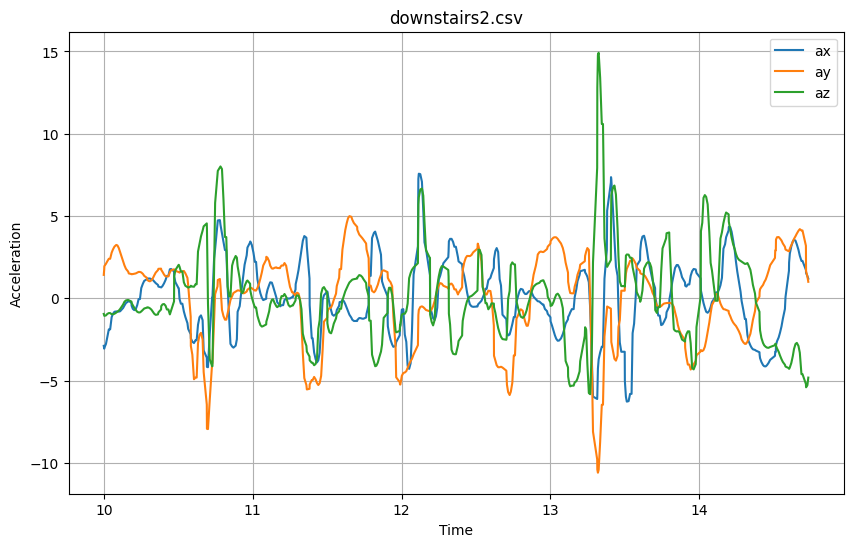

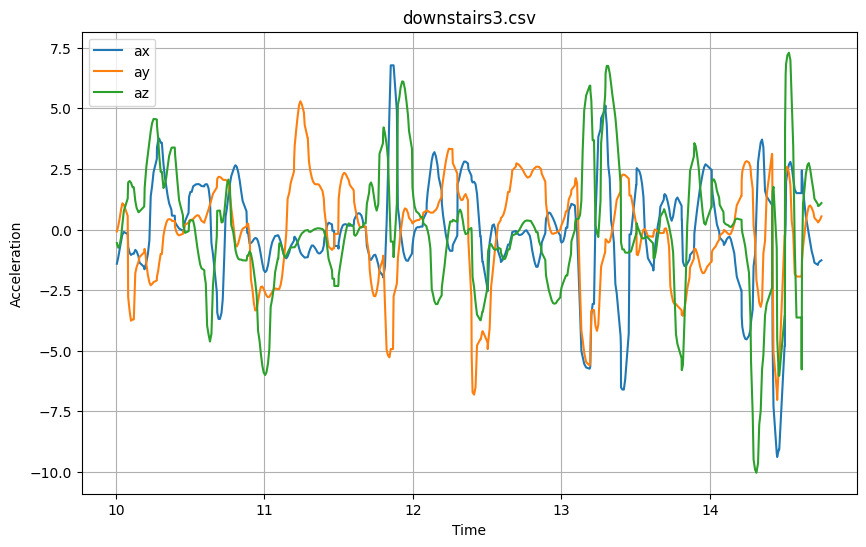

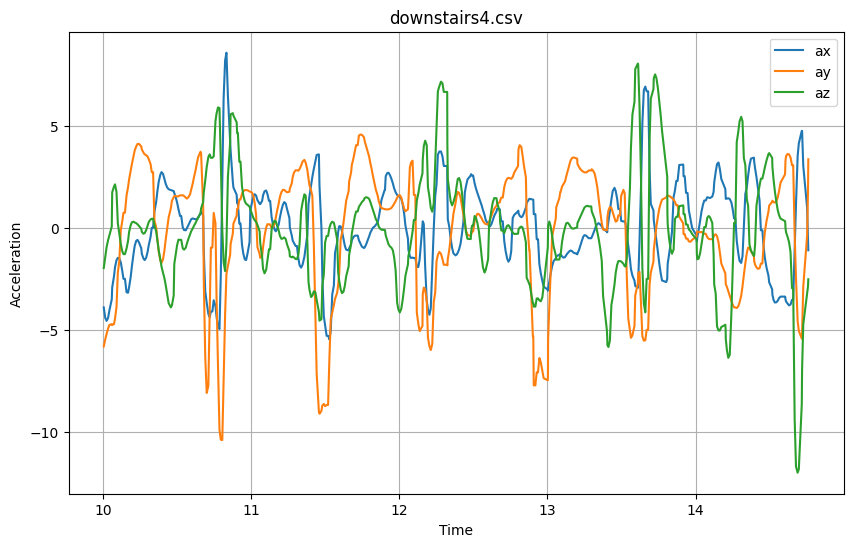

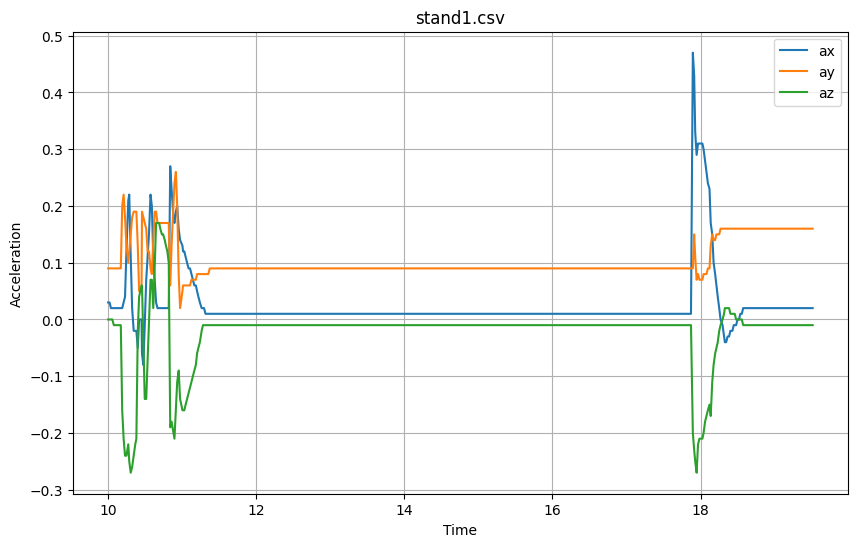

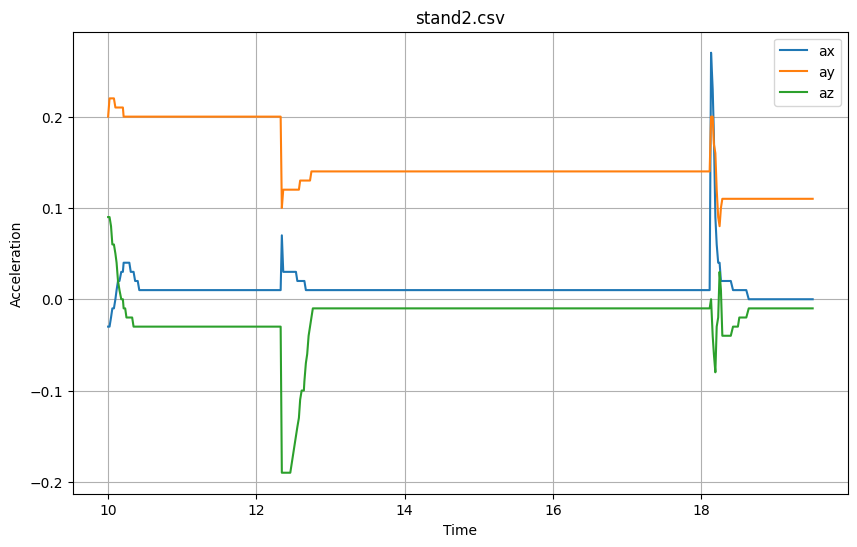

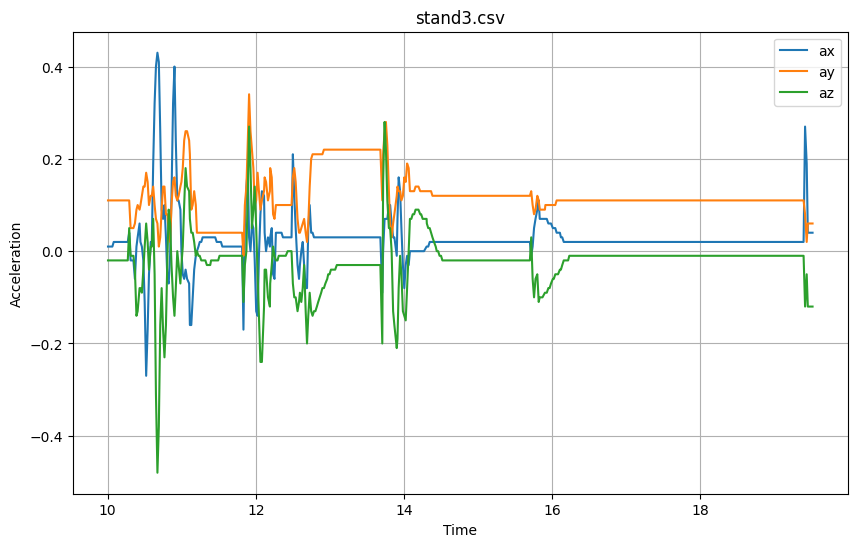

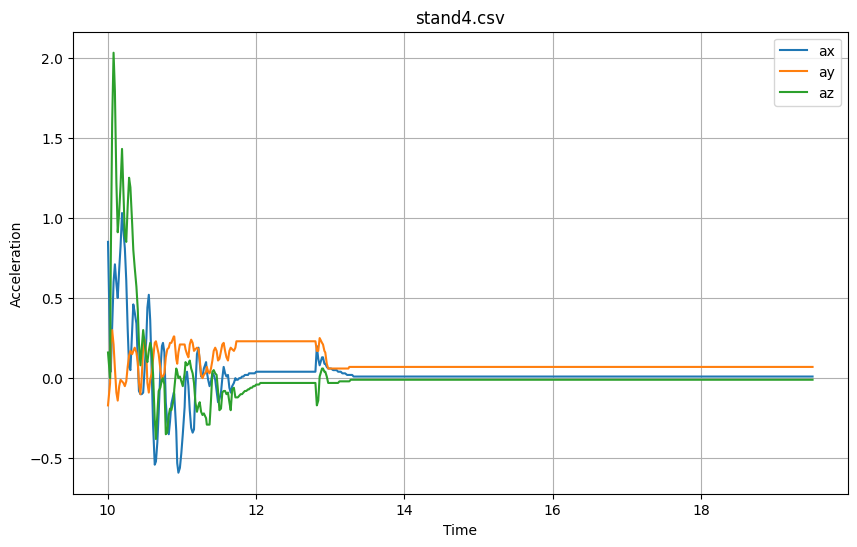

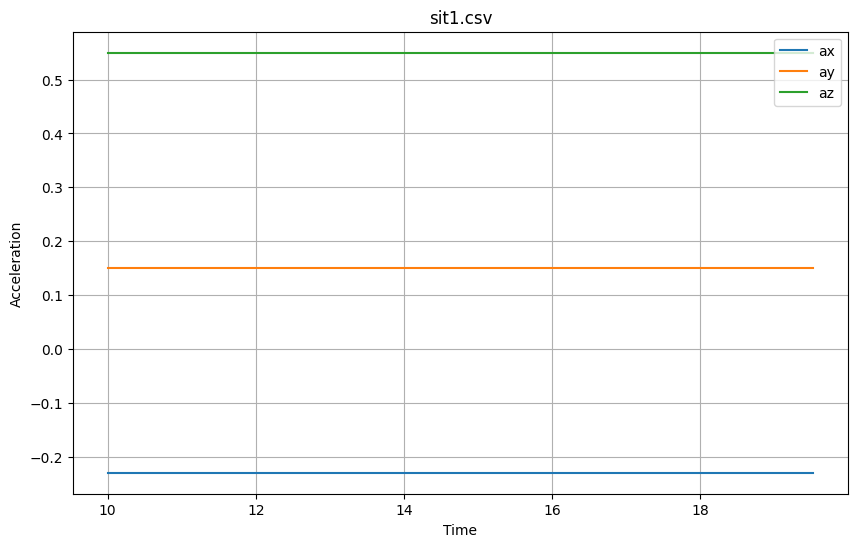

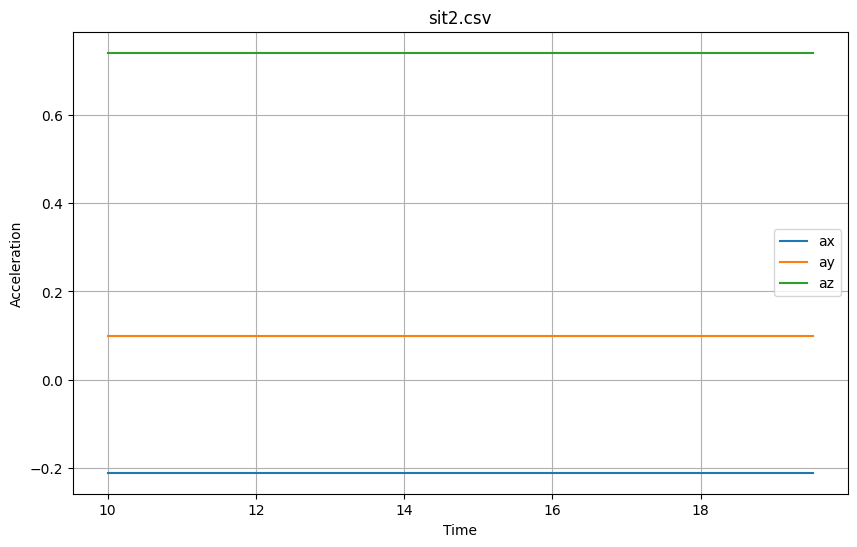

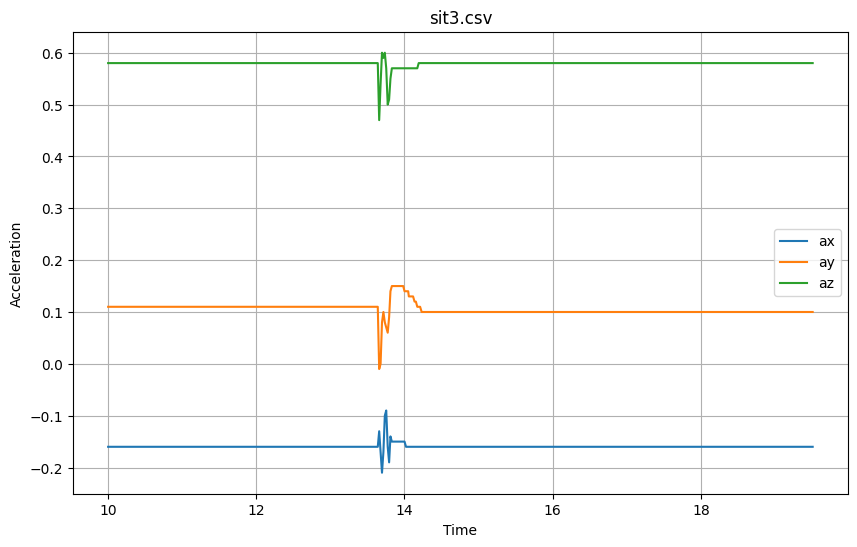

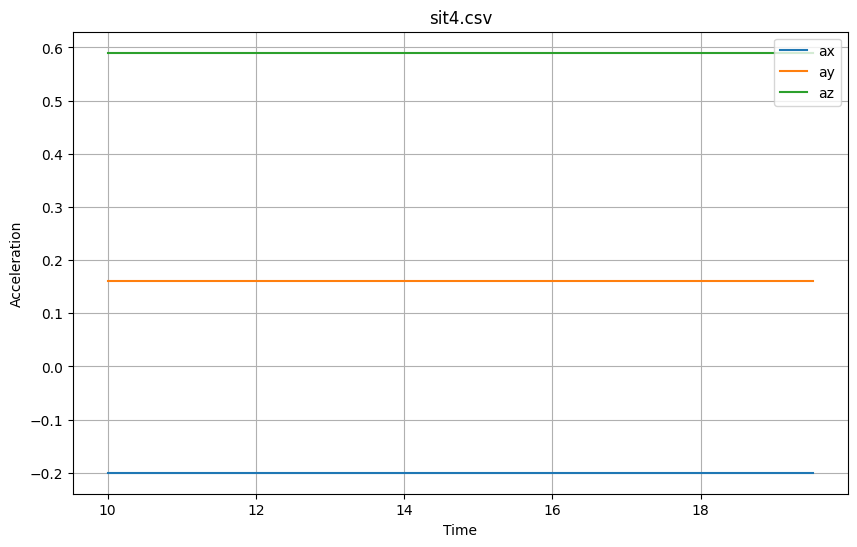

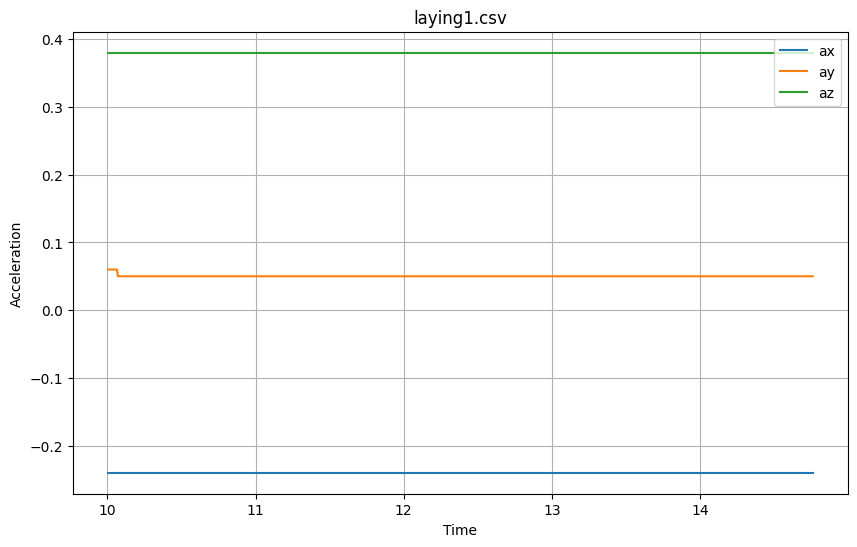

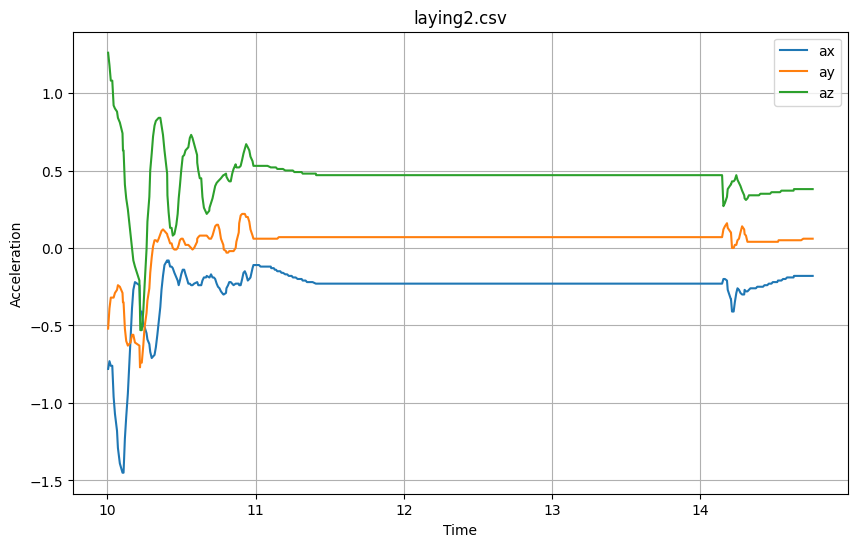

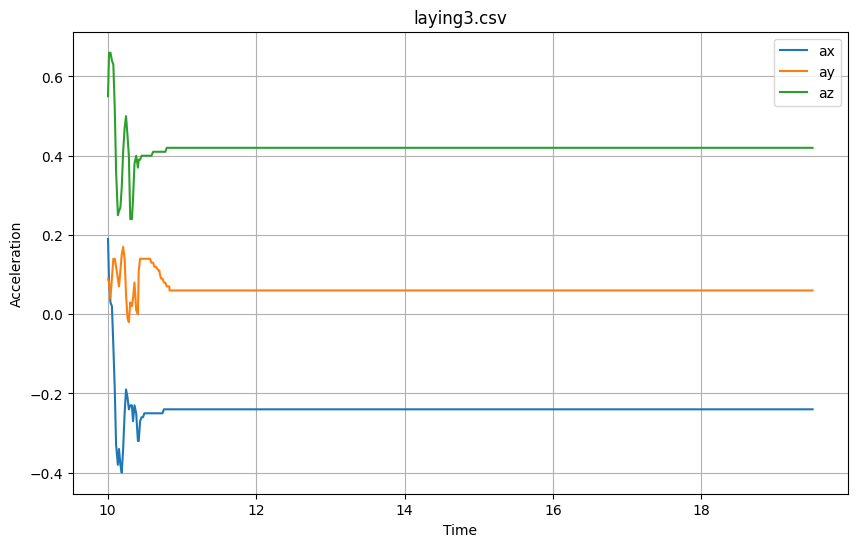

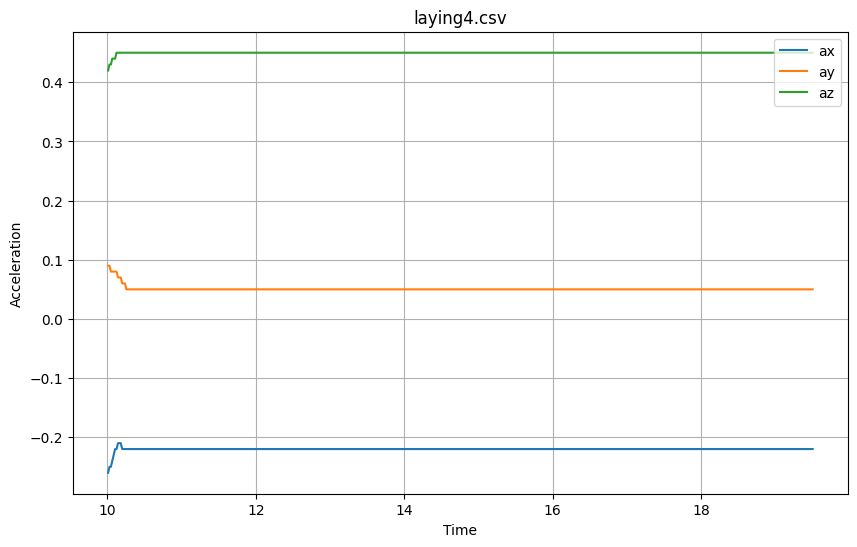

In [3]:
walking_data=['walking1.csv','walking2.csv','walking3.csv','walking4.csv',]
upstairs_data=['upstairs1.csv','upstairs2.csv','upstairs3.csv','upstairs4.csv',]
downstairs_data=['downstairs1.csv','downstairs2.csv','downstairs3.csv','downstairs4.csv',]
stand_data=['stand1.csv','stand2.csv','stand3.csv','stand4.csv',]
sit_data=['sit1.csv','sit2.csv','sit3.csv','sit4.csv',]
laying_data=['laying1.csv','laying2.csv','laying3.csv','laying4.csv',]

activities=[walking_data,upstairs_data,downstairs_data,sit_data,stand_data,laying_data]

trim_start=10
trim_end=20

for activity in activities:
    for file_name in activity:
        df=pd.read_csv(os.path.join('raw-data',file_name),sep=",")
        df=df[["time","accx","accy","accz"]]
        trimmed_df=df[(df['time']>=trim_start)&(df['time']<trim_end)]
        downscaled_df=trimmed_df.iloc[::(len(trimmed_df)//500), :].head(500)
        downscaled_df=downscaled_df.reset_index().drop("index",axis=1)
        downscaled_df.to_csv(os.path.join('processed',"processed-"+file_name),sep=",")
        plot(downscaled_df,file_name)
